In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

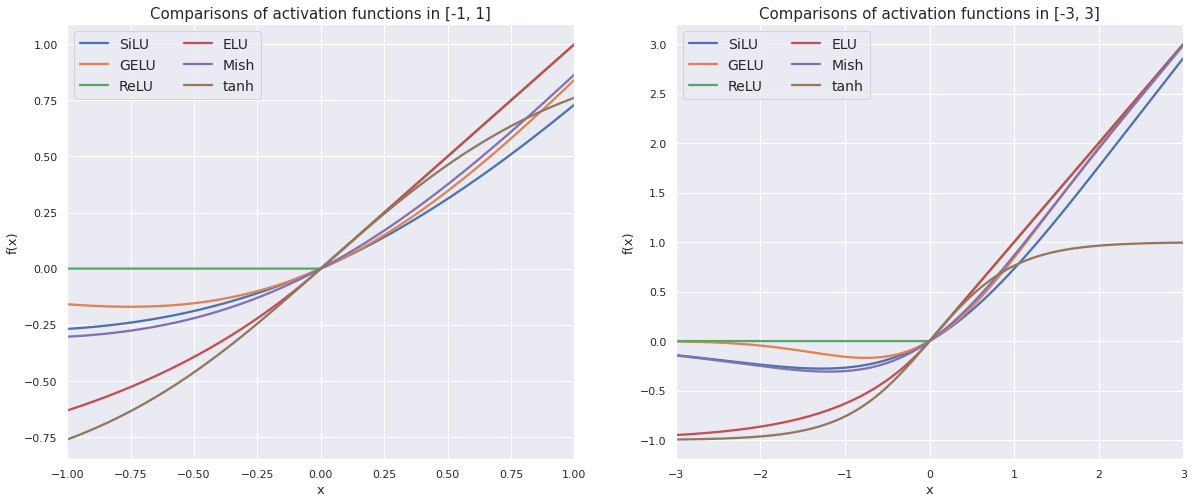

In [2]:
x_ranges = [
    (-1, 1),
    (-3, 3)
]
lw = 2.3
f, ax = plt.subplots(1, 2, figsize=(20, 8))
for i in range(len(x_ranges)):
    x_min, x_max = x_ranges[i]
    x = torch.linspace(x_min, x_max, 1000)
    y_silu = F.silu(x)
    y_gelu = F.gelu(x)
    y_relu = F.relu(x)
    y_elu = F.elu(x)
    y_mish = F.mish(x)
    y_tanh = torch.tanh(x)
    ax[i].plot(x, y_silu, label='SiLU', linewidth=lw)
    ax[i].plot(x, y_gelu, label='GELU', linewidth=lw)
    ax[i].plot(x, y_relu, label='ReLU', linewidth=lw)
    ax[i].plot(x, y_elu, label='ELU', linewidth=lw)
    ax[i].plot(x, y_mish, label='Mish', linewidth=lw)
    ax[i].plot(x, y_tanh, label='tanh', linewidth=lw)
    ax[i].legend(fontsize=14, ncol=2)
    ax[i].set_title(f'Comparisons of activation functions in [{x_min}, {x_max}]', fontsize=15)
    ax[i].set_xlabel('x', fontsize=13)
    ax[i].set_ylabel('f(x)', fontsize=13)
    ax[i].set_xlim([x_min, x_max])
# plt.savefig('../results/images/activations.png', bbox_inches='tight')
plt.show()

In [3]:
print('\t  min\t\t  max')
print(f"x:\t{x_min:.4f}\t\t{x_max:.4f}")
for n, y in [('SiLU', y_silu), ('GELU', y_gelu), ('ReLU', y_relu), ('ELU', y_elu), ('Mish', y_mish), ('Tanh', y_tanh)]:
    min_ = y.min().item()
    max_ = y.max().item()
    print(f"{n}:\t{min_:.4f}\t\t{max_:.4f}")

	  min		  max
x:	-3.0000		3.0000
SiLU:	-0.2785		2.8577
GELU:	-0.1700		2.9960
ReLU:	0.0000		3.0000
ELU:	-0.9502		3.0000
Mish:	-0.3088		2.9865
Tanh:	-0.9951		0.9951
